In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define constants
a = 0.2
L = 1.0
N = 201
CFL = 0.5
dx = L / (N - 1)
dt = CFL * dx / np.abs(a)
x = np.linspace(0, L, N)
T = 2.5



In [3]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement MacCormack discretization scheme
def macCormack_update(u, a, dt, dx):
    u_tilde = u.copy()
    
    # Predictor step
    for i in range(1, N - 1):
        u_tilde[i] = u[i] - a * dt / dx * (u[i+1] - u[i])

    # Corrector step
    for i in range(1, N - 1):
        u[i] = 0.5 * (u[i] + u_tilde[i] - a * dt / dx * (u_tilde[i] - u_tilde[i-1]))

    # Apply periodic boundary conditions
    u[0] = u[-2]
    u[-1] = u[1]

    return u



Wave energy (initial): 1.2275e-06
Wave energy (final): 1.2715e-06
Wave Energy Percentage Change 3.59 %


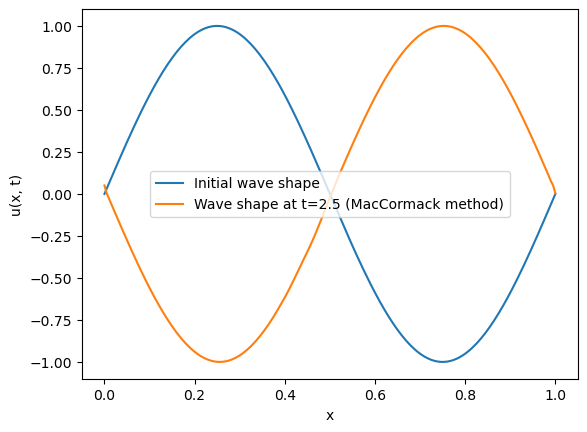

In [4]:
# Solve the wave equation using MacCormack method
u = u0(x)
for t in np.arange(0, T, dt):
    u = macCormack_update(u, a, dt, dx)

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

E_initial = wave_energy(u0(x), dx) / N
E_final = wave_energy(u, dx) / N

print("Wave energy (initial):", round((E_initial), 10))
print("Wave energy (final):", round((E_final), 10))
print("Wave Energy Percentage Change", round(((E_final - E_initial) / E_initial * 100), 2), "%")

# Plot the solution
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u, label="Wave shape at t=2.5 (MacCormack method)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()


